<a href="https://colab.research.google.com/github/itsdheeraj99/Food_classifier/blob/master/Food_class_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#tensorboard callback function

import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback




### Loading the data

In [ ]:

(train_data, test_data), ds_info = tfds.load(name = 'food101',
                                           split = ["train", "validation"],
                                           shuffle_files = True,
                                           as_supervised = True,
                                           with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteKFOQ2A/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteKFOQ2A/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
#List of all the food classes
classes_N = ds_info.features["label"].names
classes_N.sort()
classes_N

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

### Exploring Data

In [ ]:
#Exploring the dataset by picking out one image.
sample = train_data.take(1)
for image, label in sample:
  print(f"Image shape: {image.shape}")
  print(f"Image dtype: {image.dtype}")
  print(f"Image class: {classes_N[label]}")

Image shape: (512, 289, 3)
Image dtype: <dtype: 'uint8'>
Image class: frozen_yogurt


(512, 289, 3)


(-0.5, 288.5, 511.5, -0.5)

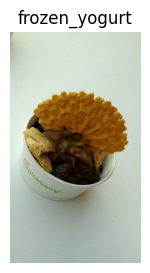

In [ ]:
print(image.shape)
plt.figure(figsize = (5,3))
plt.imshow(image)
plt.title(classes_N[label])
plt.axis(False)

In [ ]:
def preprocess_img(image,label, image_shape = 224):
  image = tf.image.resize(image, [image_shape, image_shape])
  image = tf.image.convert_image_dtype(image, tf.float32)
  return image, label

In [ ]:
preprocessed_img = preprocess_img(image, label)
preprocessed_img
#print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
#print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[147.19739, 153.19739, 127.19739],
         [157.22768, 163.22768, 137.22768],
         [158.09805, 164.09805, 138.09805],
         ...,
         [197.     , 209.     , 197.54907],
         [197.     , 209.     , 199.     ],
         [198.09914, 208.38936, 199.24425]],
 
        [[154.69467, 160.69467, 134.69467],
         [155.87053, 161.87053, 135.87053],
         [158.39908, 164.39908, 138.39908],
         ...,
         [197.     , 209.     , 197.54907],
         [197.     , 209.     , 199.     ],
         [196.32831, 206.61853, 195.76364]],
 
        [[154.56473, 158.56473, 133.56473],
         [153.49234, 158.17635, 132.83435],
         [157.76036, 163.3318 , 137.54608],
         ...,
         [197.     , 209.     , 197.54907],
         [197.     , 209.     , 197.87054],
         [197.85489, 208.51149, 197.1832 ]],
 
        ...,
 
        [[176.88599, 189.88599, 180.88599],
         [175.68573, 188.96552, 179.87225]

### Batch & preparing Datasets

In [ ]:
# Define batch size and prefetch buffer size
batch_size = 32
prefetch_buffer_size = tf.data.AUTOTUNE

# Create training data pipeline with data augmentation
train_data = train_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=prefetch_buffer_size)

# Create test data pipeline
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size).prefetch(prefetch_buffer_size)

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

### Building the model

In [ ]:
input_shape = (224,224,3)

#Base model
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False)
base_model.trainable = False

#Functional model
inputs = tf.keras.layers.Input(shape = input_shape, name = "Input_layer")
#layer = tf.keras.layers.Rescaling(1./255)(inputs)
layer = base_model(inputs, training = False)
layer = tf.keras.layers.GlobalAveragePooling2D(name = "Pooling_layer")(layer)

layer = tf.keras.layers.Dense(len(classes_N),kernel_regularizer = tf.keras.regularizers.l2(0.005))(layer)

outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(layer)

model = tf.keras.Model(inputs,outputs)





16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
#Compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])


In [ ]:
for layer in model.layers:
  layer.trainable = True

In [ ]:
#Compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(0.0001),
              metrics = ['accuracy'])


In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
#checkpoint_path = "fine_tune_checkpoints/"
#model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
#                                                      save_best_only=False,
#                                                      monitor="val_loss")

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                min_lr=1e-7)

### Fitting the data to model

In [ ]:
#fitting the model on the data
history_food101_B0 = model.fit(train_data,
                        epochs = 15,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.15 * len(test_data)),
                               callbacks = [early_stopping, reduce_lr])





Epoch 1/15
2368/2368 [==============================] - 668s 258ms/step - loss: 2.3202 - accuracy: 0.5841 - val_loss: 1.4286 - val_accuracy: 0.7566 - lr: 1.0000e-04
Epoch 2/15
2368/2368 [==============================] - 632s 265ms/step - loss: 1.3404 - accuracy: 0.7633 - val_loss: 1.1912 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 3/15
2368/2368 [==============================] - 613s 257ms/step - loss: 0.9318 - accuracy: 0.8384 - val_loss: 1.0688 - val_accuracy: 0.7958 - lr: 1.0000e-04
Epoch 4/15
2368/2368 [==============================] - 625s 263ms/step - loss: 0.6399 - accuracy: 0.8975 - val_loss: 1.0232 - val_accuracy: 0.7897 - lr: 1.0000e-04
Epoch 5/15
2368/2368 [==============================] - 613s 258ms/step - loss: 0.4524 - accuracy: 0.9327 - val_loss: 1.1257 - val_accuracy: 0.7770 - lr: 1.0000e-04
Epoch 6/15
2368/2368 [==============================] - ETA: 0s - loss: 0.3411 - accuracy: 0.9525
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 4,136,929
Non-train

In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 66s 83ms/step - loss: 1.1700 - accuracy: 0.8098


[1.1700265407562256, 0.8098217844963074]

<ipython-input-19-a2ea70b2ec70>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  _ = plt.style.library['seaborn-darkgrid']


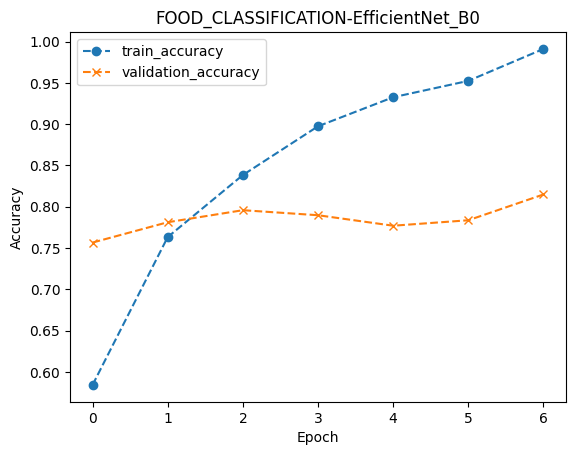

In [ ]:
# Plot training-accuracy & validation-accuracy.
_ = plt.style.library['seaborn-darkgrid']
_ = plt.title('FOOD_CLASSIFICATION-EfficientNet_B0')
_ = plt.plot(history_food101_B0.history['accuracy'], marker='o', linestyle='dashed')
_ = plt.plot(history_food101_B0.history['val_accuracy'], marker='x', linestyle='dashed')
_ = plt.ylabel('Accuracy')
_ = plt.xlabel('Epoch')
_ = plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
plt.show()

<ipython-input-20-7b5271d56d63>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  _ = plt.style.library['seaborn-darkgrid']


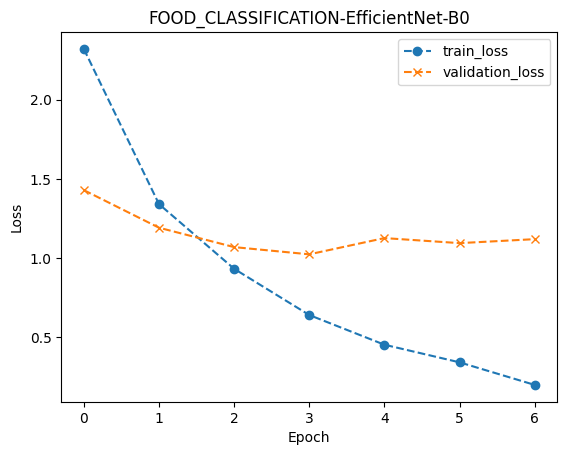

In [ ]:
# Plot training-loss & validation-loss.
_ = plt.style.library['seaborn-darkgrid']
_ = plt.title('FOOD_CLASSIFICATION-EfficientNet-B0')
_ = plt.plot(history_food101_B0.history['loss'], marker='o', linestyle='dashed')
_ = plt.plot(history_food101_B0.history['val_loss'], marker='x', linestyle='dashed')
_ = plt.ylabel('Loss')
_ = plt.xlabel('Epoch')
_ = plt.legend(['train_loss', 'validation_loss'], loc='best')
plt.show()

In [ ]:
m1 = tf.saved_model.load("/content/drive/MyDrive/food_vision101")

In [ ]:
class_name = {name: index for index, name in enumerate(classes_N)}
#class_name

In [ ]:
from PIL import Image

def predict_class(model, folder_path, show=True):
    images = [os.path.join(folder_path, img_name) for img_name in os.listdir(folder_path)]
    for img_path in images:
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Resize the image to the model's input size
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize pixel values (if required)

        pred = model.predict(img_array)
        index = np.argmax(pred)
        pred_value = class_name[index]  # Assuming foods_sorted is defined elsewhere
        if show:
            plt.imshow(img)
            plt.axis('off')
            plt.title(pred_value)
            plt.show()
            print(index)


In [ ]:
folder_path = "/content/drive/MyDrive/Food_Images"

#predict_class(model, folder_path, show = True)

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report


# Make predictions on the test data
y_true = []  # True labels
y_pred = []  # Predicted labels

for images, labels in test_data:
    # Predict on batch of test data
    predictions = model.predict(images,verbose = 0)
    # Convert predictions to class labels
    predicted_labels = np.argmax(predictions, axis=1)

    # Extend the true and predicted labels lists
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Generate the classification report

report = classification_report(y_true, y_pred, target_names=classes_N)




In [ ]:
print(report)

                         precision    recall  f1-score   support

              apple_pie       0.70      0.52      0.59       250
         baby_back_ribs       0.88      0.73      0.80       250
                baklava       0.83      0.85      0.84       250
         beef_carpaccio       0.83      0.83      0.83       250
           beef_tartare       0.74      0.80      0.77       250
             beet_salad       0.66      0.76      0.70       250
               beignets       0.82      0.88      0.85       250
               bibimbap       0.89      0.92      0.90       250
          bread_pudding       0.65      0.68      0.66       250
      breakfast_burrito       0.71      0.74      0.72       250
             bruschetta       0.72      0.76      0.74       250
           caesar_salad       0.80      0.86      0.83       250
                cannoli       0.88      0.90      0.89       250
          caprese_salad       0.83      0.80      0.82       250
            carrot_cake 